# **LABORATORY TASK 3**

**Monique Antoinette R. Mendoza**

**DS4A**


---

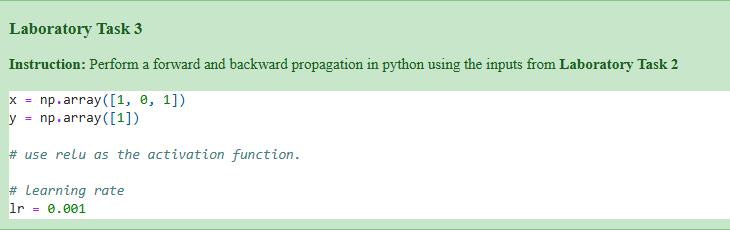

In [31]:
import numpy as np

In [32]:
# Inputs and target
x = np.array([[1, 0, 1]])   # Input values
y = np.array([[1]])          # Target output


In [33]:
# Weights from Laboratory Task 2
W_hidden = np.array([[0.2, -0.3],
                     [0.4, 0.1],
                     [-0.5, 0.2]])

W_output = np.array([[-0.3],
                     [-0.2]])

In [34]:
# Biases
theta_hidden = np.array([[-0.4, 0.2, 0.1]]).T
b_hidden = theta_hidden[:2].T
b_output = theta_hidden[2:]

In [35]:
# Activation function: ReLU and its derivative
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# Learning rate
lr = 0.001

# **FORWARD PROPAGATION**

In [36]:
#  FORWARD PROPAGATION
Z_hidden = np.dot(x, W_hidden) + b_hidden         # Hidden layer weighted sum
A_hidden = relu(Z_hidden)                         # Hidden layer activation
Z_output = np.dot(A_hidden, W_output) + b_output  # Output layer weighted sum
y_pred = Z_output                                 # Linear output


print("Hidden layer weighted sums (Z_hidden):\n", Z_hidden)
print("\nHidden layer activations (A_hidden):\n", A_hidden)
print("\nPredicted Output (ŷ):\n", y_pred)


Hidden layer weighted sums (Z_hidden):
 [[-0.7  0.1]]

Hidden layer activations (A_hidden):
 [[0.  0.1]]

Predicted Output (ŷ):
 [[0.08]]


In [41]:
# Compute Error
E = 0.5 * (y - y_pred)**2  # Error
print("\nError (E):\n", E)


Error (E):
 [[0.4232]]


In this code we did **Forward Propagation** first, meaning we passed the inputs through the network to get a predicted output. The ReLU activation made sure negative values became zero. Our model predicted a value close to `0.08`, while the true value was `1`, so we calculated the error around `0.4232`, it shows how far the prediction is from the correct answer.

# **BACKWARD PROPAGATION**

In [38]:
# Derivative of error w.r.t output
dE_dy = -(y - y_pred)

# Gradient for output layer weights
dE_dW_output = np.dot(A_hidden.T, dE_dy)


In [39]:
# Gradient for hidden layer
dE_dA_hidden = np.dot(dE_dy, W_output.T)
dA_dZ_hidden = relu_derivative(Z_hidden)
dE_dZ_hidden = dE_dA_hidden * dA_dZ_hidden
dE_dW_hidden = np.dot(x.T, dE_dZ_hidden)

In [40]:
#  UPDATE WEIGHTS
W_output -= lr * dE_dW_output
W_hidden -= lr * dE_dW_hidden

print("\nUpdated Hidden Weights:\n", W_hidden)
print("\nUpdated Output Weights:\n", W_output)


Updated Hidden Weights:
 [[ 0.2      -0.300184]
 [ 0.4       0.1     ]
 [-0.5       0.199816]]

Updated Output Weights:
 [[-0.3     ]
 [-0.199908]]


Here we did **Backward Propagation** to help the model learn. This calculated how much each weight affected the error and made small updates using the `learning rate = 0.001`. You can see that the output and hidden weights changed a little, the hidden weight went from `0.2` to `-0.300184`, while the output weights changed to `[[-0.3], [-0.199908]]`. These means the model adjusts its values slowly and carefully. This process helps the network improve its prediction little by little, reducing the error each time it learns.